$$\textbf{Supervised Machine Learning}$$

$\textit{Supervised}$ machine learning: Learn to predict target values from labelled data. (Classification, target values are discrete values. Regression, target values are continuous values). 

$\textbf{References:}$ Applied machine learning in python, Coursera, University of Michigan

$$\textbf{Models in this script:}$$

$\bullet$ Support vector machines: Binary classification of data, we aim to estimate $w$ and $b$ such that the function $sign(w\cdot x + b)$ predicts the target values. Among all the linear classifiers the one that solves $\max_{w,b}\{\min_{x\in X}\{dist(w\cdot x + b,x)\}\} $, where X is the set of test points, is called the linear support vector machine. (The linear classifier with the maximum margin). Margin = $\min_{x\in X}\{dist(w\cdot x + b,x)\}$.

Linear models, in the case of linear and logistic regression, are simple and easy to train.

Linear models including LSVM also perform effectively on high dimentional data set, especially, in cases where the data instances are sparse. Linear Models scale well to very large datasets as well.

$\bullet$ Decision Trees:


In [2]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

$$\textbf{Synthetic regression data}$$

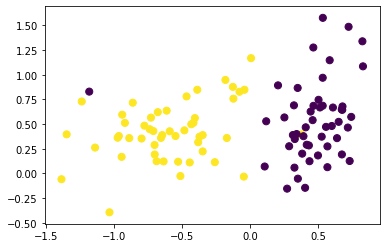

In [13]:
#Binary classification dataset
from sklearn.datasets import make_classification
X_D1, y_D1 = make_classification(n_samples = 100, n_features=2,  n_redundant=0, n_informative=2,
                                n_clusters_per_class=1, flip_y = 0.1, class_sep = 0.5, random_state=1)

plt.scatter(X_D1[:, 0], X_D1[:, 1], c = y_D1, marker= 'o', s=50 )
plt.show()

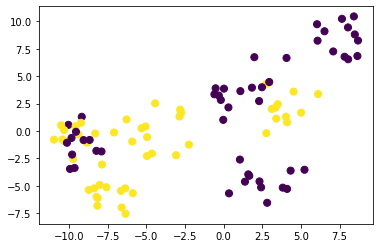

In [16]:
# more difficult synthetic dataset for classification (binary) 
# with classes that are not linearly separable
from sklearn.datasets import make_blobs
X_D2, y_D2 = make_blobs(n_samples = 100, n_features = 2, centers = 8,
                       cluster_std = 1.3, random_state = 3)
y_D2 = y_D2 % 2
plt.scatter(X_D2[:,0], X_D2[:,1], c=y_D2,
           marker= 'o', s=50)
plt.show()

$$\textbf{Linear Support Vector Machines - LSVM}$$

In [27]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state = 0)

C_value = 1.0
clf = SVC(kernel = 'linear', C = C_value).fit(X_train, y_train)
clf.score(X_test, y_test), clf.score(X_train, y_train)

(0.6, 0.76)

In [60]:
from matplotlib.colors import ListedColormap
def plot_class_regions_for_classifier(clf, X, y, X_test=None, y_test=None, title=None, 
                                              target_names = None, plot_decision_regions = True, sub_plot=plt):

    numClasses = np.max(y) + 1
    c_light, c_bold = ['#FFFFAA', '#EFEFEF', '#AAFFAA', '#AAAAFF'] , ['#EEEE00', '#000000', '#00CC00', '#0000CC']
    
    cmap_light , cmap_bold= ListedColormap(c_light[0:numClasses]), ListedColormap(c_bold[0:numClasses])

    h , k = 0.03, 0.5

    x_min, x_max, y_min, y_max = X[:, 0].min() , X[:, 0].max(), X[:, 1].min(), X[:, 1].max()
    x2, y2 = np.meshgrid(np.arange(x_min-k, x_max+k, h), np.arange(y_min-k, y_max+k, h))

    P = clf.predict(np.c_[x2.ravel(), y2.ravel()])
    P = P.reshape(x2.shape)
    #plt.figure()
    if plot_decision_regions:
        sub_plot.contourf(x2, y2, P, cmap=cmap_light, alpha = 0.8)

    sub_plot.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, s=50, edgecolor = 'black')
    plt.xlim(x_min - 0.1, x_max + 0.1)  ,  plt.ylim(y_min - 0.1, y_max + 0.1)

    if (X_test is not None):
        sub_plot.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_bold, s=50, marker='^', edgecolor = 'black')
        train_score = clf.score(X, y)
        test_score  = clf.score(X_test, y_test)
        title = title + "\nTrain score = {:.2f}, Test score = {:.2f}".format(train_score, test_score)
        print(title)
        
    if (target_names is not None):
        legend_handles = []
        for i in range(0, len(target_names)):
            patch = mpatches.Patch(color=color_list_bold[i], label=target_names[i])
            legend_handles.append(patch)
        sub_plot.legend(loc=0, handles=legend_handles)

    if (title is not None):
        plt.title(title)

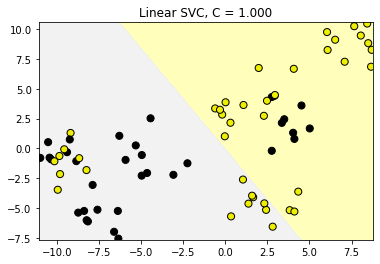

In [61]:
title = 'Linear SVC, C = {:.3f}'.format(C_value)
plot_class_regions_for_classifier(clf, X_train, y_train, None, None, title, None, True )

Linear SVC, C = 0.00001
Train score = 0.67, Test score = 0.72
Linear SVC, C = 100.00000
Train score = 0.33, Test score = 0.36


C:\Users\Usuario\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


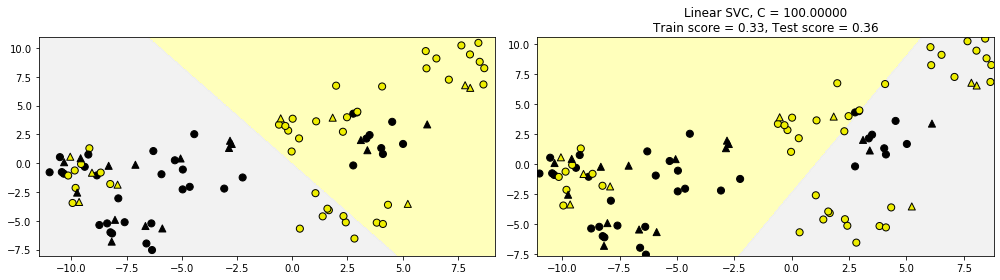

In [62]:
from sklearn.svm import LinearSVC

X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state = 0)

fig, subaxes = plt.subplots(1, 2, figsize=(14, 4))

for C_val, subplot in zip([0.00001, 100], subaxes):
    clf = LinearSVC(C=C_val).fit(X_train, y_train)
    title = 'Linear SVC, C = {:.5f}'.format(C_val)
    plot_class_regions_for_classifier(clf, X_train, y_train,
                                             X_test, y_test , title, None, True, subplot )
plt.tight_layout()